## 1. What A Waste Global Database - Introduction
<p> What a Waste is a global project to aggregate data on solid waste management from around the world. This database features the statistics collected through the effort, covering nearly all countries and over 330 cities. The metrics included cover all steps from the waste management value chain, including waste generation, composition, collection, and disposal, as well as information on user fees and financing, the informal sector, administrative structures, public communication, and legal information. The information presented is the best available based on a study of current literature and limited conversations with waste agencies and authorities. While there may be variations in the definitions and quality of reporting for individual data points, general trends should reflect the global reality. All sources and any estimations are noted.</p>

In [8]:
# Import required modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set aesthetics for plotting in a Jupyter notebook.
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

# Read in the data.
CityData = pd.read_csv("Datasets/city_level_data_0_0.csv")
CountryData = pd.read_csv("Datasets/country_level_data_0.csv")
CityCode = pd.read_csv("Datasets/city_level_codebook_0.csv")
CountryCode = pd.read_csv("Datasets/country_level_codebook.csv")

## 2. First glance at the data
<p>Let's take a look the data to find out how many observations and variables we have at our disposal.</p>

In [14]:
# Display summary for CityData.
print('Cities\n')
CityData.info()
# Display summary for CityCode.
print('\nCity Codes\n')
CityCode.info()
# Display summary for CountryData.
print('\nCountries\n')
CountryData.info()
# Display summary for CountryCode.
print('\nCountry Codes\n')
CountryCode.info()

Cities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Columns: 113 entries, iso3c to waste_treatment_waterways_marine_percent
dtypes: float64(70), object(43)
memory usage: 324.1+ KB

City Codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   regionID      684 non-null    object 
 1   iso3c         684 non-null    object 
 2   country_name  684 non-null    object 
 3   city_name     684 non-null    object 
 4   incomeID      684 non-null    object 
 5   measurement   684 non-null    object 
 6   units         684 non-null    object 
 7   year          680 non-null    float64
 8   source        682 non-null    object 
 9   comments      227 non-null    object 
dtypes: float64(1), object(9)
memory usage: 53.6+ KB

Countries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 5

## 3. Total municipal solid waste (MSW) by region

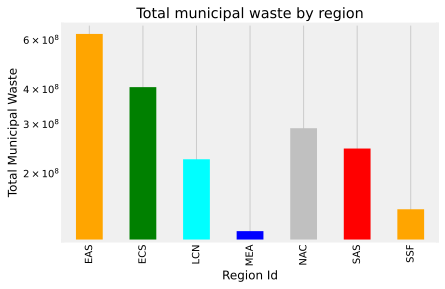

In [47]:
# Summarise total msw by region.
MSWPerRegion = CountryData[['region_id', 'total_msw_total_msw_generated_tons_year']].groupby('region_id').agg(
    total_msw_tons_year_region = pd.NamedAgg(column='total_msw_total_msw_generated_tons_year', aggfunc=sum)
)

# Set the aesthetics for the plot.
Title = "Total municipal waste by region"
XLabel = "Region Id"
YLabel = "Total Municipal Waste"
Colors = ['orange', 'green', 'cyan', 'blue', 'silver', 'red']
# Plot the barplot with the title defined above.
PlotMpR = MSWPerRegion.total_msw_tons_year_region.plot.bar(title=Title, logy=True, color=Colors)

# Annotate both axis with the label defined above.
PlotMpR.set_xlabel(XLabel)
PlotMpR.set_ylabel(YLabel);

## 4. Top 10 countries with the highest Total MSW

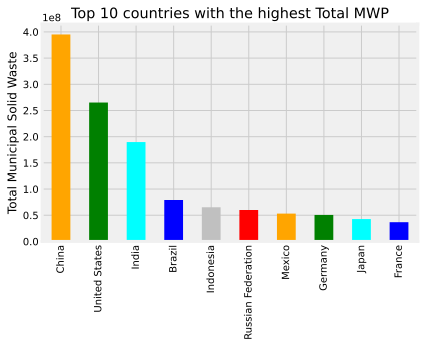

In [104]:
# Select the 'country_name' and the 'total_msw_total_msw_generated_tons_year' columns.
MSWPerCountry = CountryData[['country_name', 'total_msw_total_msw_generated_tons_year']]
# Select 10 rows with the highest msw.
MSWPerCountry10 = MSWPerCountry.sort_values('total_msw_total_msw_generated_tons_year', ascending=False).head(10)
# Plotting the barplot with the title defined above.
PlotMpC = MSWPerCountry10.plot.bar(x='country_name', y='total_msw_total_msw_generated_tons_year', title='Top 10 countries with the highest Total MWP', color=Colors)
# Remove legend.
PlotMpC.get_legend().remove()
# Annotate both axis with the label defined above.
PlotMpC.set_xlabel('')
PlotMpC.set_ylabel('Total Municipal Solid Waste');

## 5. Correlation between gdp and msw in those countries
As we can see from the scatter plot below, the middle income countries create on average higher total municipal solid waste.

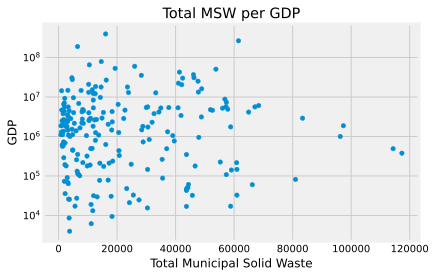

In [105]:
MSWperGDP = CountryData[['country_name', 'gdp', 'total_msw_total_msw_generated_tons_year']]
# Plot the scatterplot with gdp against the total MSW.
PlotMpGDP = MSWperGDP.plot.scatter(x='gdp', y='total_msw_total_msw_generated_tons_year', title='Total MSW per GDP', logy=True)
# Annotating both axis with the label defined above.
PlotMpGDP.set_xlabel('Total Municipal Solid Waste')
PlotMpGDP.set_ylabel('GDP');

## 6. Top 10 cities with the highest MSW

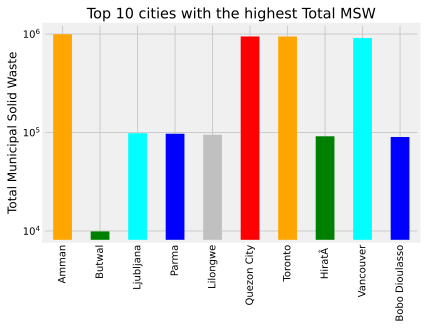

In [106]:
# Select the 'city_name' and the 'total_msw_total_msw_generated_tons_year' columns.
MSWPerCity = CityData[['city_name', 'total_msw_total_msw_generated_tons_year']]
# Selecting the first 10 rows and setting the index
MSWPerCity10 = MSWPerCity.sort_values('total_msw_total_msw_generated_tons_year', ascending=False).head(10)
# Plotting the barplot with the title defined above.
MSWPerCity10.total_msw_total_msw_generated_tons_year = pd.to_numeric(MSWPerCity10.total_msw_total_msw_generated_tons_year)
PlotMpc = MSWPerCity10.plot.bar(x='city_name', y='total_msw_total_msw_generated_tons_year', title='Top 10 cities with the highest Total MSW', logy=True, color=Colors)
# Remove legend.
PlotMpc.get_legend().remove()
# Annotating both axis with the label defined above.
PlotMpc.set_xlabel('')
PlotMpc.set_ylabel('Total Municipal Solid Waste');